In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from tqdm import tqdm, trange

In [2]:
# Initializing lattice & spins: Create an n x n lattice with random values of +1 or -1
def generate_lattice(n):
    spin_matrices = np.random.choice([-1, 1], size=(3, n, n))
    return spin_matrices

In [3]:
def hamiltonian(spin_matrices, n):
    H = 0
    for k in range(3):
        lattice = spin_matrices[k, :, :]
        for i in range(n):
            for j in range(n):
                H += - J * lattice[i][j] * (lattice[(i-1)%n][j] + lattice[(i+1)%n][j] + lattice[i][(j-1)%n] + lattice[i][(j+1)%n]) 
                - B * lattice[i][j] * int(k==d)
    return H*J

In [4]:
def plot_lattice(spin_matrices, figsize=(12, 4)):
    fig, axes = plt.subplots(1, 3, figsize=figsize)
    labels = ['x', 'y', 'z']
    for i in range(3):
        lattice = spin_matrices[i, :, :]
        binary_lattice = (lattice + 1) // 2  # Convert -1 and 1 to 0 and 1
        axes[i].imshow(binary_lattice, cmap="binary", origin="upper")
        axes[i].set_title(f"Spin {labels[i]}")  # Add the label as the title
        axes[i].axis("on")  # Show the axes
    plt.tight_layout()
    plt.show()

In [5]:
def metropolis(spin_matrices, n, b, iter):
    H = hamiltonian(spin_matrices, n)
    H_list = []
    for i in trange(iter):
        if i%1000 == 0: H_list.append(H)

        comp = np.random.choice([0, 1, 2])
        a, b = np.random.randint(0, n), np.random.randint(0, n)
        spin_matrices[comp, a, b] *= -1

        H_new = H - J*2*spin_matrices[comp, a, b]*(spin_matrices[comp, (a-1)%n, b] + 
        spin_matrices[comp, (a+1)%n, b] + spin_matrices[comp, a, (b-1)%n] + spin_matrices[comp, a, (b+1)%n]) 
        - 2*B*spin_matrices[comp, a, b]

        if H_new > H:
            if np.random.rand() > math.exp(-(H_new - H)*b):
                # if iter%1000 == 0: print(H_new - H, math.exp(-(H_new - H)*b))
                spin_matrices[comp, a, b] *= -1
                continue
        H = H_new
    return spin_matrices, list, H_list

In [19]:
iter = 500000
n = 100
J = -1  # 1: ferro, -1: antiferro
b = 0.1
B = 20
d = 2

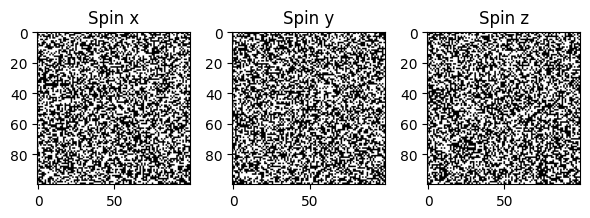

In [20]:
spin_matrices = generate_lattice(n)
plot_lattice(spin_matrices, figsize = (6,3))

In [21]:
spin_matrices_new, list, H_list = metropolis(spin_matrices.copy(), n=n, b=b, iter=iter)
print(H_list)

100%|██████████| 500000/500000 [00:07<00:00, 66489.67it/s]

[160, -1176, -2392, -3624, -4740, -5944, -7064, -8192, -9064, -9952, -10792, -11732, -12560, -13288, -13984, -14716, -15336, -15928, -16516, -17124, -17740, -18204, -18772, -19316, -19864, -20316, -20900, -21328, -21824, -22256, -22664, -23096, -23508, -23932, -24372, -24796, -25136, -25532, -25848, -26200, -26640, -26996, -27288, -27624, -27940, -28240, -28524, -28804, -29068, -29356, -29640, -29944, -30196, -30440, -30776, -31028, -31284, -31492, -31788, -32060, -32280, -32532, -32812, -32980, -33264, -33528, -33748, -34016, -34148, -34300, -34428, -34604, -34772, -34912, -35040, -35184, -35404, -35604, -35780, -35976, -36152, -36340, -36500, -36636, -36836, -36940, -37072, -37232, -37400, -37508, -37656, -37744, -37832, -37932, -38000, -38176, -38324, -38420, -38540, -38692, -38824, -38968, -39124, -39172, -39336, -39456, -39576, -39684, -39776, -39848, -40004, -40096, -40216, -40316, -40400, -40476, -40540, -40636, -40704, -40796, -40928, -41008, -41092, -41200, -41272, -41356, -41

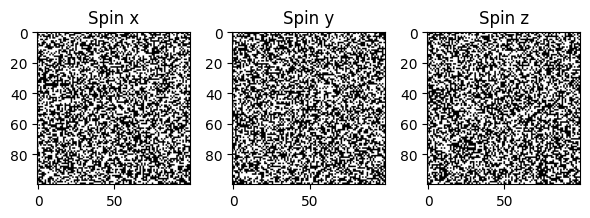

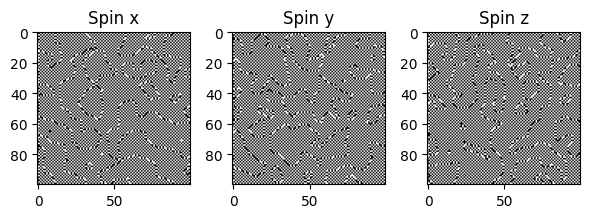

In [22]:
plot_lattice(spin_matrices, figsize=(6,3))
plot_lattice(spin_matrices_new, figsize = (6,3))

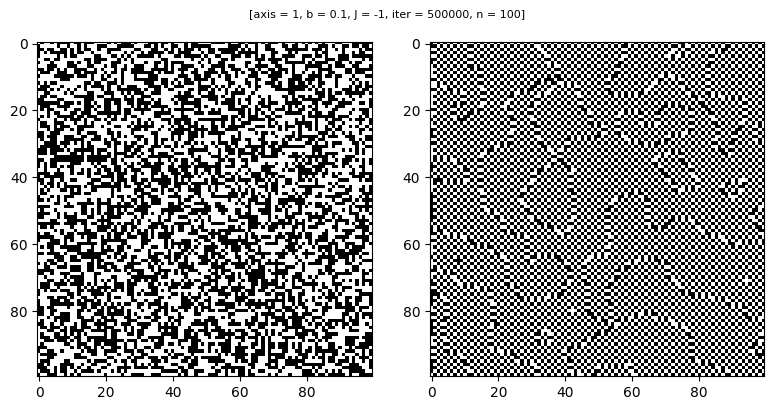

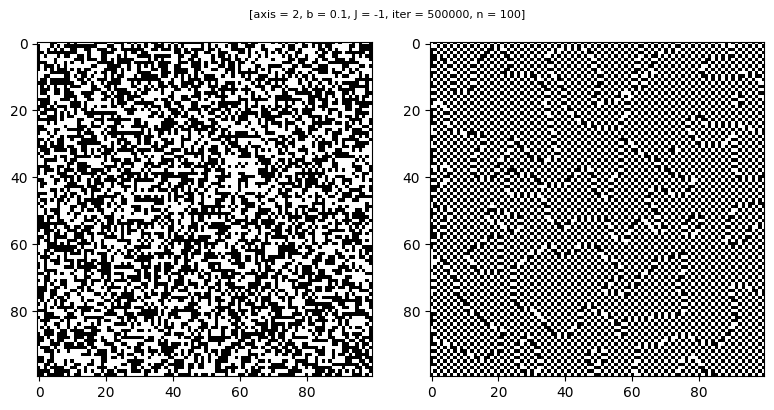

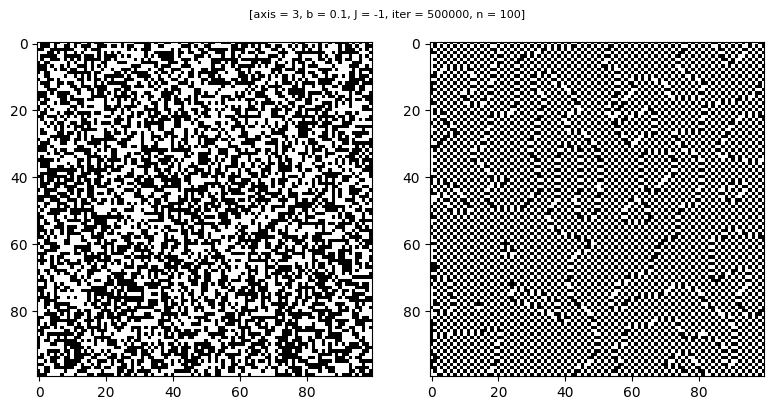

In [23]:
from plotter import plot_3map
plot_3map(spin_matrices, spin_matrices_new, b, J, iter, n, figsize =(8, 4))

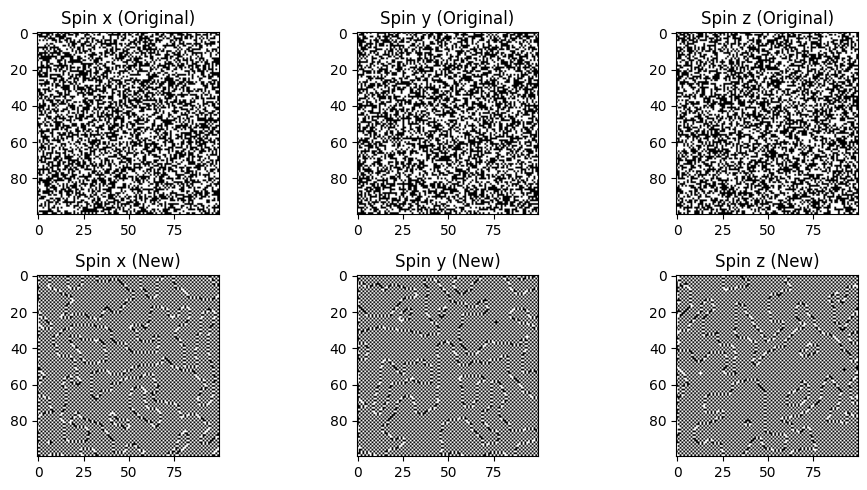

In [11]:
def plot_lattices2(spin_matrices, spin_matrices_new, figsize=(12, 8)):
    fig, axes = plt.subplots(2, 3, figsize=figsize)
    labels = ['x', 'y', 'z']
    
    # Plot spin_matrices in the first row
    for i in range(3):
        lattice = spin_matrices[i, :, :]
        binary_lattice = (lattice + 1) // 2  # Convert -1 and 1 to 0 and 1
        axes[0, i].imshow(binary_lattice, cmap="binary", origin="upper")
        axes[0, i].set_title(f"Spin {labels[i]} (Original)")
        axes[0, i].axis("on")
    
    # Plot spin_matrices_new in the second row
    for i in range(3):
        lattice_new = spin_matrices_new[i, :, :]
        binary_lattice_new = (lattice_new + 1) // 2
        axes[1, i].imshow(binary_lattice_new, cmap="binary", origin="upper")
        axes[1, i].set_title(f"Spin {labels[i]} (New)")
        axes[1, i].axis("on")

    # Adjust layout
    plt.tight_layout()
    plt.show()
plot_lattices2(spin_matrices, spin_matrices_new, figsize=(10, 5))